In [13]:
#memory that we can use
!free -h --si | awk  '/Mem:/{print $2}'
#GPU count and name
!nvidia-smi

13G
Wed Jan 20 07:57:33 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   75C    P0    31W /  70W |   5885MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+---

In [14]:
import sys
import os
mp = os.path.abspath(os.path.join('/content/drive/My Drive/GraduationThesis/gitrepo/GraduationThesis/'))
sys.path.append(mp)

In [15]:
import torch
from modules import IGR, Visualization, Operation, Network

In [16]:
# GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [17]:
# Define data set name and constraint type
dataset_name = 'stanford-bunny'
p = 2
constraint_name = str(p) + 'laplacian'
prev_epoch = 1000
epoch = 1000
network_ver = 'v1_1'
batch_size = 4096

In [18]:
# Load points from file
filename = mp + '/dataset/3d/' + dataset_name + '.xyz'
data = Operation.read_txt3(filename, device=device)

In [19]:
traineddata_path = mp + '/models/' + dataset_name + '_' + constraint_name + '_' + str(prev_epoch) + '_' + network_ver + '.traineddata'
model, optimizer, scheduler = Network.load_model(traineddata_path, dimension=3, device=device)

Model loaded


Setting up
Loss values loaded
Getting sampling range

Training
Epoch: 1020   Loss: 0.014429478906095028   Learning rate: 1.953125e-06
Surface loss: 0.00019947504915762693   Normal loss: 0.014149455353617668   Constraint: 8.054845238802955e-05

Epoch: 1040   Loss: 0.01426263153553009   Learning rate: 1.953125e-06
Surface loss: 0.00020986839081160724   Normal loss: 0.013972584158182144   Constraint: 8.017910295166075e-05

Epoch: 1060   Loss: 0.014198092743754387   Learning rate: 1.953125e-06
Surface loss: 0.00022520596394315362   Normal loss: 0.01388675905764103   Constraint: 8.612732199253514e-05

Epoch: 1080   Loss: 0.014268863946199417   Learning rate: 1.953125e-06
Surface loss: 0.000225774449063465   Normal loss: 0.013963522389531136   Constraint: 7.956725312396884e-05

Epoch: 1100   Loss: 0.014211997389793396   Learning rate: 1.953125e-06
Surface loss: 0.00019256949599366635   Normal loss: 0.013937253504991531   Constraint: 8.217436698032543e-05

Epoch: 1120   Loss: 0.01405951008200

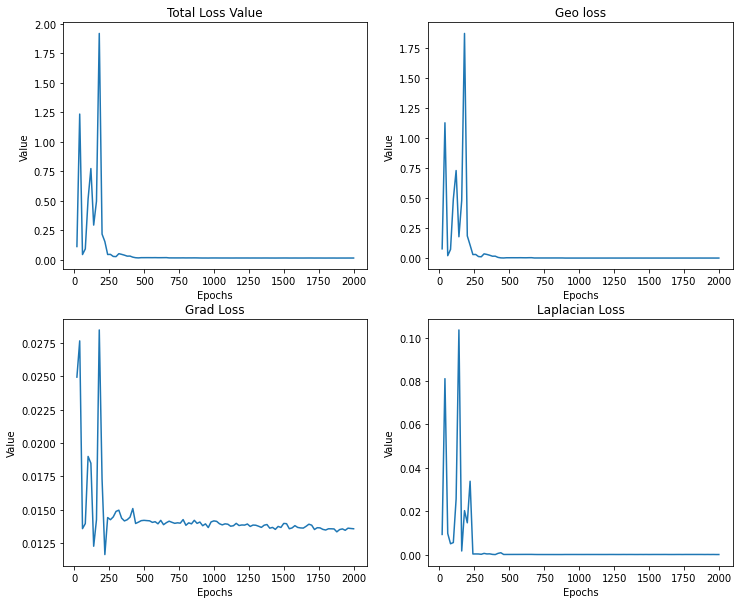

In [20]:
outfile = mp + '/figures/loss_value/' + dataset_name + '_' + constraint_name + '_' + network_ver + '.npy'
model, optimizer, scheduler = IGR.train(epoch,
                             model,
                             optimizer,
                             scheduler,
                             p=p,
                             batch_size=batch_size,
                             data=data,
                             loss_output_path=outfile,
                             device=device)

In [21]:
save_path = mp + '/models/' + dataset_name + '_' + constraint_name + '_' + str(prev_epoch + epoch) + '_' + network_ver + '.traineddata'
Network.save_model(save_path, model, optimizer, scheduler)

All shells below are commented out to save data usage

In [22]:
# xx, yy, zz = Visualization.grid_from_torch(data[:,0:3], resx=16, resy=16, resz=16, device=device)

In [23]:
# constraint_output = None
# vtk_output_path = dataset_name + '_' + constraint_name + '_' + str(prev_epoch + epoch) + '_' + network_ver + '.vtk'
# z = Visualization.nn_sampling(model, xx, yy, zz, 
#                               constraint_output=constraint_output,
#                               vtk_output_path = vtk_output_path,
#                               device=device)

In [24]:
# Visualization.visualize3(data[:,0:3].detach().cpu().numpy(), data[:,3:6].detach().cpu().numpy(), z.detach().cpu().numpy(), scatter=False, vecfield=False)